
<img src="https://i.ibb.co/1T5Wbn6/Banner-para-Linkedin-capa-de-perfil-para-programador.png"  alt="KCode Banner"  />

<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>


# Estatística Bivariada
## Variável quntitativa x variável quantitativa

## Objetivo:

* Análisar a correlação entre duas váriaveis e determinar seu tipo

### Metodologia/Passos

* Conectar a API do Kaggle e baixar um conjunto de dados aleatórios;
* Escolher as váriaveis;
* Plotar gráficos;
* Determinar o tipo da relação.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
import statistics as stats
import math
import scipy.stats
import numpy as np


In [2]:
# Utilizando a API para baixar uma amostra policotomica de dados, referente a tumores, licença CC0(Domínio público).
!kaggle datasets download -d imrulhasanrobi/world-population-all-countries-different-parameter

world-population-all-countries-different-parameter.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# Descompactando o arquivo baixado
z = ZipFile('world-population-all-countries-different-parameter.zip', 'r')
z.extractall()
z.close()

In [4]:
# Criando um data frame

df = pd.read_csv('dados\World countries all countries different parameter.csv', encoding='Latin1',)
df.head()

,Country or Dependency,Population(2020),Yearly Change,Net Change,Density(p/km^2),Land Area(km^2),Migrants,Fert Rate,Med Age,Urban,World Share,Regions
0,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38,61%,18.47%,Asia
1,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28,35%,17.70%,Asia
2,Indonesia,"273,523,615",1.07%,"2,898,047",151,"1,811,570","-98,955",2.3,30,56%,3.51%,Asia
3,Pakistan,"220,892,340",2.00%,"4,327,022",287,"770,880","-233,379",3.6,23,35%,2.83%,Asia
4,Bangladesh,"164,689,383",1.01%,"1,643,222","1,265","130,170","-369,501",2.1,28,39%,2.11%,Asia


## Entendendo o conjunto de dados:
O conjunto contém informações sobre a população de diferentes países, incluindo dados demográficos e indicadores econômicos.

* Country or Dependency: Nome do país;
* Population(2020): População em 2020;
* Yearly Change: Variação Anual;
* Net Change: Mudança líquida na população por ano presente.;
* Density(p/km^2): Densidade poulacional;
* Land Area(km^2): Territorio;
* Migrants: Migrantes;
* Fert Rate: "Fert rate" pode ser traduzido para "taxa de fertilidade" em português. É um indicador demográfico que mede a quantidade média de filhos que uma mulher tem durante sua vida fértil;
* Med Age: Idade Média;
* Urban: Teritório Urbano;
* World Share: Fatia do todo mundial;
* Regions: Região;



Fonte: Kaggle


In [5]:
# Verificando os tipos primitivos.
df.dtypes

Country or Dependency    object
Population(2020)         object
Yearly Change            object
Net Change               object
Density(p/km^2)          object
Land Area(km^2)          object
Migrants                 object
Fert Rate                object
Med Age                  object
Urban                    object
World Share              object
Regions                  object
dtype: object

In [6]:
# As virgulas estão sendo usadas para separa milhar, vamos remover elas.
for nome_coluna in df.columns:
    df[nome_coluna] = df[nome_coluna].str.replace(',', '')

In [7]:
df.head()

,Country or Dependency,Population(2020),Yearly Change,Net Change,Density(p/km^2),Land Area(km^2),Migrants,Fert Rate,Med Age,Urban,World Share,Regions
0,China,1439323776,0.39%,5540090,153,9388211,-348399,1.7,38,61%,18.47%,Asia
1,India,1380004385,0.99%,13586631,464,2973190,-532687,2.2,28,35%,17.70%,Asia
2,Indonesia,273523615,1.07%,2898047,151,1811570,-98955,2.3,30,56%,3.51%,Asia
3,Pakistan,220892340,2.00%,4327022,287,770880,-233379,3.6,23,35%,2.83%,Asia
4,Bangladesh,164689383,1.01%,1643222,1265,130170,-369501,2.1,28,39%,2.11%,Asia


In [9]:
# Corrigindo os tipos primitivos
df[['Population(2020)', 'Med Age']] = df[['Population(2020)', 'Med Age']].astype(int)

ValueError: invalid literal for int() with base 10: '579400.00%'

In [10]:
# Localizando o erro
df['Population(2020)'].iloc[210]

'579400.00%'

In [11]:
# Corrigindo o erro
df.iloc[210] = df.iloc[210].str.slice(stop=-4)
df['Population(2020)'].iloc[210]

'579400'

In [12]:
# Corrigindo os tipos primitivos novamente
df[['Population(2020)', 'Med Age']] = df[['Population(2020)', 'Med Age']].astype(int)

ValueError: invalid literal for int() with base 10: 'N.A.'

In [13]:
# Removendo o erro de valores nulos 
df['Med Age'] = df['Med Age'].replace('N.A.', 0)

In [14]:
# Corrigindo os tipos primitivos novamente
df[['Population(2020)', 'Med Age']] = df[['Population(2020)', 'Med Age']].astype(int)

ValueError: invalid literal for int() with base 10: ''

In [15]:
# Esse erro ocorre porque há pelo menos uma string vazia no objeto que você está tentando converter em inteiro. Para resolver esse problema, vamos usar o método to_numeric do pandas para converter todas as strings vazias em valores nulos (NaN) antes de converter o objeto em inteiro.
df['Med Age'] = pd.to_numeric(df['Med Age'], errors='coerce').astype('float32')

In [16]:
# Corrigindo os tipos primitivos novamente
df['Population(2020)'] = df['Population(2020)'].astype(int)

In [17]:
# Verificando os tipos primitivos
df.dtypes

Country or Dependency     object
Population(2020)           int32
Yearly Change             object
Net Change                object
Density(p/km^2)           object
Land Area(km^2)           object
Migrants                  object
Fert Rate                 object
Med Age                  float32
Urban                     object
World Share               object
Regions                   object
dtype: object

In [19]:
# Calculando a correlação entre duas colunas
correlation = df['Med Age'].corr(df['Population(2020)'])

# Exibe o resultado da correlação onde -1 indica uma correlação perfeita negativa, 0 indica nenhuma correlação e 1 indica uma correlação perfeita positiva. Um resultado próximo de 0 indica uma correlação fraca, enquanto um resultado próximo de -1 ou 1 indica uma correlação forte.
print(f"Coeficiente de correlação: {correlation:.2f}")

Coeficiente de correlação: 0.09


> Correlação positiva fraca, mas arredondando podemos considerar que não há correlação.

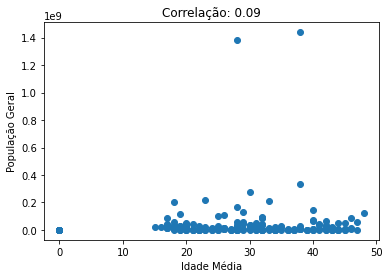

In [23]:
# plotando um gráfico de dispersão com as duas colunas
plt.scatter(df['Med Age'], df['Population(2020)'])
plt.xlabel('Idade Média')
plt.ylabel('População Geral')
plt.title(f"Correlação: {correlation:.2f}")
plt.show()